# Project 5002, Five-in-a-Row Game 

## <span style="color:blue">Monte Carlo Tree Search</span> 

### In the previous assignment, we have already implemented some of the building blocks of the game Five-in-a row. In this project, you are asked to complete the game design such that the computer will play with a human interactively.

### The core part of the game design is the Monte Carlo Tree Search (MCTS), as we have learned during lecture 9. The MCTS helps the computer to choose the next move

### A game can be represented by a tree. Each tree node relates to a particular state in the game. On performing a move, one makes a transition from a node to its childen. To describe how promising each child node is, we describe each node by the reward, which is defined as m/n. m being the number of wins of the corresponding player, n being the total number of plays spreading out of this node. You also need to assign a color for each node, which describes which player is playing now.

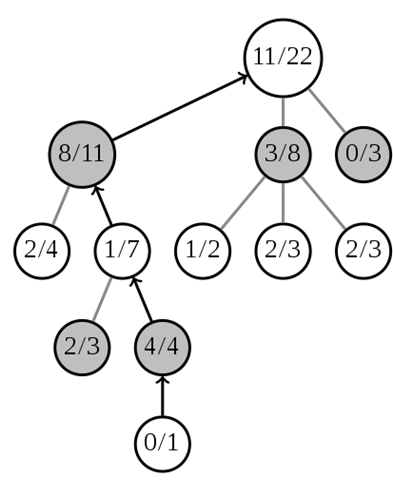

###  In reality, instead of using $m/n$ for the reward, people more often use the Upper Confidence Bound(UCB) as the reward. The UCT is defined as $\frac{m}{n}+c\sqrt{\frac{log(n_{parent})}{n}}$. Here $n_{parent}$ is the n of the node visited before this one. One concern of using the m/n is that the program will seldom visit the nodes with bad performance in the first few simulation. Thus, we will use this reward for the project instead

### Before the computer makes a move, it will run a lot of simulations by itself. Each simulation will start from the current state. The computer randomly places a series of acceptable stones for both players until a tie or win/loss happens. Then the result will be used to update the reward of all nodes in the path/simulation. To be more specific, all n increase by 1. If the white wins, then all white nodes have m+=1. If the black wins, then all black nodes have m+=1. If a tie occurs, m will increase by 1/2.

### The essence of the Monte Carlo Tree Search is to explore different branchs of the game tree via self plays. In this process, the computer updates the rewards of each visited nodes, which will later be used as a criteria for choosing the most promising next move

### Before diving into the MCTS, we want to first clarify a few definitions regarding the nodes in the graph. A root node is the current state where the computer starts MCTS.  A terminal node is a state where game result (win/lose/draw)  are concluded. A node is considered visited if a 'rollout' (wavy line in the third graph) has been started from that node. All nodes node passed through during the rollout are not considered as visited.  With that being said, all nodes in the below graphs are visited. Lastly, a leaf node is the last visited nodes for any path from the root to the end.

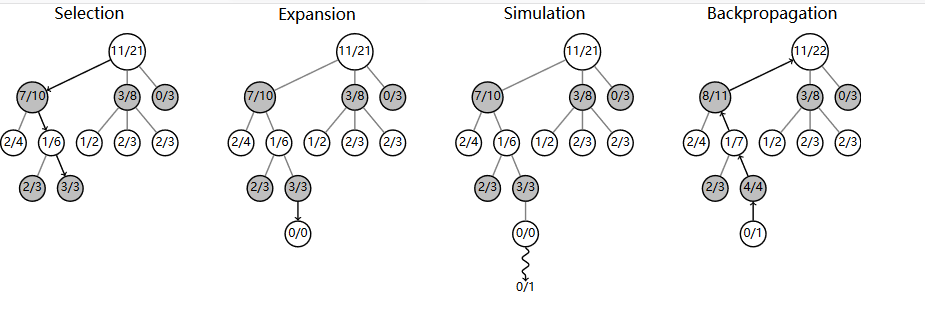

### The MCTS can be divided into four steps. 1st, the program traverses from the root node to leaf node by choosing the one with best reward. (Selection). Then it visited the siblings of the leaf node. If all siblings are visted, the program visits the children of the leaf node. (Expansion). Starting from there, it runs one 'rollout' and get the result. (Simulation). Lastly, the result is backpropagated to the root and reward of all nodes in the path get updated. (Backpropagation).

### This process have be presented by the following PSUDOCODE

In [2]:
def monte_carlo_tree_search(root):
    while resources_left(time, computational power):
        leaf = traverse(root) # leaf = unvisited node 
        simulation_result = rollout(leaf)
        backpropagate(leaf, simulation_result)
    return best_child(root)

# For the traverse function, to avoid using up too much time or resources, you may start considering only 
# a subset of children (e.g 5 children). Increase this number or by choosing this subset smartly later.
def traverse(node):
    while fully_expanded(node):
        node = best_uct(node)
    return pick_univisted(node.children) or node # in case no children are present / node is terminal 
                                                 
def rollout(node):
    while non_terminal(node):
        node = rollout_policy(node)
    return result(node) 

def rollout_policy(node):
    return pick_random(node.children)

def backpropagate(node, result):
   if is_root(node) return 
   node.stats = update_stats(node, result) 
   backpropagate(node.parent)

def best_child(node):
    pick child with highest number of visits        

SyntaxError: invalid syntax (<ipython-input-2-f711a8266fa2>, line 2)

### Each run of the above process will update the reward once. You may run it repeatedly until the time limit is reached or resources are used up.

### With the information of the reward, the computer will choose the best children VISITED as the next move. Then it will wait for the input from human and repeat the aforementioned steps until loss/win/tie. 

## <span style="color:blue">Graphical User Interface</span> 

### In this part, we will replace the command line interface into the Graphical User Interface. Here we provide you with some help functions with the pygame tool. But you are free to use any GUI tool you like.

### If you decide to use the pygame library, you need to install it first. Go to 'start' and open the 'Anaconda Prompt' window, then type in 'pip install pygame'. The pygame will be installed automatically. 

Help Functions

In [9]:
def update_by_man(event,mat):
    """
    This function detects the mouse click on the game window. Update the state matrix of the game. 
    input: 
        event:pygame event, which are either quit or mouse click)
        mat: 2D matrix represents the state of the game
    output:
        mat: updated matrix
    """
    global M
    done=False
    if event.type==pygame.QUIT:
        done=True
    if event.type==pygame.MOUSEBUTTONDOWN:
        (x,y)=event.pos
        row = round((y - 40) / 40)     
        col = round((x - 40) / 40)
        mat[row][col]=1
    return mat, done
def draw_board(screen):    
    """
    This function draws the board with lines.
    input: game windows
    output: none
    """
    global M
    M=4
    d=int(560/(M-1))
    black_color = [0, 0, 0]
    board_color = [ 241, 196, 15 ]
    screen.fill(board_color)
    for h in range(0, M):
        pygame.draw.line(screen, black_color,[40, h * d+40], [600, 40+h * d], 1)
        pygame.draw.line(screen, black_color, [40+d*h, 40], [40+d*h, 600], 1)
def draw_stone(screen, mat):
    """
    This functions draws the stones according to the mat. It draws a black circle for matrix element 1(human),
    it draws a white circle for matrix element -1 (computer)
    input:
        screen: game window, onto which the stones are drawn
        mat: 2D matrix representing the game state
    output:
        none
    """
    black_color = [0, 0, 0]
    white_color = [255, 255, 255]
    M=len(mat)
    d=int(560/(M-1))
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            if mat[i][j]==1:
                pos = [40+d * j, 40+d* i ]
                pygame.draw.circle(screen, black_color, pos, 18,0)
            elif mat[i][j]==-1:
                pos = [40+d* j , 40+d * i]
                pygame.draw.circle(screen, white_color, pos, 18,0)

def render(screen, mat):
    """
    Draw the updated game with lines and stones using function draw_board and draw_stone
    input:
        screen: game window, onto which the stones are drawn
        mat: 2D matrix representing the game state
    output:
        none        
    """
    
    draw_board(screen)
    draw_stone(screen, mat)
    pygame.display.update()

Your code here

In [ ]:
def check_for_done(mat):
    """
    please write your own code testing if the game is over. Return a boolean variable done. If one of the players wins
    or the tie happens, return True. Otherwise return False. Print a message about the result of the game.
    input: 
        2D matrix representing the state of the game
    output:
        none
    """
    
    return done

def update_by_pc(mat):
    """
    This is the core of the game. Write your code to give the computer the intelligence to play a Five-in-a-Row game 
    with a human
    input:
        2D matrix representing the state of the game.
    output:
        2D matrix representing the updated state of the game.
    """
    return mat

### This is the main call of the game. If you run this code, you should see a window popping up. By clicking on the windows, you should be able to place a black stone on the board. By clicking on the close button on the upper right, you should be able to close the window. After you have all codes ready, uncomment the lines in the while loop and see if your computer can play the game interactively with you.

In [11]:
import pygame
import numpy as np

def main():
    
    global M
    M=4
    
    pygame.init()
    screen=pygame.display.set_mode((640,640))
    pygame.display.set_caption('Five-in-a-Row')
    done=False
    mat=np.zeros((M,M))
    d=int(560/(M-1))
    draw_board(screen)
    pygame.display.update()

    
    while not done:
        for event in pygame.event.get():
            if event.type==pygame.QUIT:
                done=True
            if event.type==pygame.MOUSEBUTTONDOWN:
                (x,y)=event.pos
                row = round((y - 40) / d)     
                col = round((x - 40) / d)
                mat[row][col]=1
                render(screen, mat)
                # check for win or tie
                # print message if game finished
                # otherwise contibue
                
                
                #get the next move from computer/MCTS
                # check for win or tie
                # print message if game finished
                # otherwise contibue
    
    pygame.quit()
    
if __name__ == '__main__':
    main()

### Congraduations if your code is functioning properly and intelligently. You may improve your code according to your own style. Save your code in a ipynb file and save a few screenshots during the game.  Write a brief introduction to the Monte Carlo Tree Search. Submit those to the Canvas.